# Training Models 





# Introduction:

So far we have treated Machine Learning models and their training algorithms mostly like black boxes.
Having good understanding of right training algorithm to use. Now we will start one of the simplest models called 

1)  __Linear Regression:__ the simplest models that use two different ways to train it: 

a) Using a direct "closed-form" equation that directly computes the model parameters that best fit the model to the training set.

b) Using an iterative optimization approach, called Gradient Descent (GD). That minimize the cost function over the 
training set. 3 variants of __Gradient Descent (Batch GD, Mini-batch GD, Stochastic GD)__

    
2)  __Polynomial Regression:__ more coplex model that can fit nonlinear datasets since this model has more parameters than Linear Rregression, reduce the risk of overfitting the training set by using learning curves and reqularizaiton techniques 
Two models used for classification tasks: **Logistic Regression** and **Softmax Regression** 

# Linear Regression

Linear model makes prediction by simply computing weighted sum of the input features plus a constant called **bias/intercept term** 

### Linear Regression model prediction:


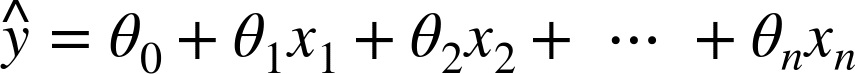

In [7]:
from IPython.core.display import Image
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/LM_model_prediction.png')

### Linear Regression model prediction (vectorized form):



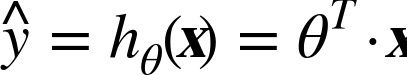

In [10]:
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/LM_model_prediction2.png')

### By using Root Mean Square Error(RMSE), to measure performance of the regression model and how well or poorly the model fit the training data
To achive that we need to find value of parameter vector θ that minimizes the RMSE.

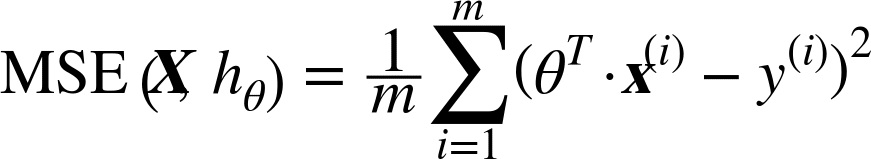

In [12]:
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/RMSE.png')

We calculate the __Mean Square Error(MSE)__ instead of **RMSE** that leads to the same result, minimizing the funciton also minimizes its square root. 




# The Normal Equation:

A mathematical equation that find value of __vector parameter__ that minimizes the cost function, a closed-form solution 

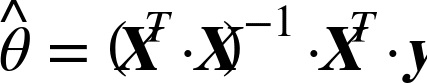

In [14]:
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/NE.png')

Normal Equation Example:

In [ ]:
#generating dataset 
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [19]:
# calculate estimated θ using inv() funciton from NumPy linear Algebra(np.linalg) to compute inverse matrix 
#and dot() method for matrix multiplication 
X_b = np.c_[np.ones((100, 1)), X] # add bias/x0 = 1 to each instance
#apply Normal Equaion
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.85948527],
       [3.08280073]])

In [27]:
#now we can make prediction using θ-hat 

X_new = np.array([[0], [2]]) #create array with 2 rows and 1 column
# add bias/x0 = 1 to each instance ,2 rows with 2 columns 
#the firs columns filled with ones and second with X_new column [0] and [2]
#np.c_ :object of class, slice objects to concatenation along the second axis.
X_new_b = np.c_[np.ones((2, 1)), X_new] 
#dot product, multiplication of two arrays, 1D array
y_predict = X_new_b.dot(theta_best) 
y_predict

array([[ 3.85948527],
       [10.02508674]])

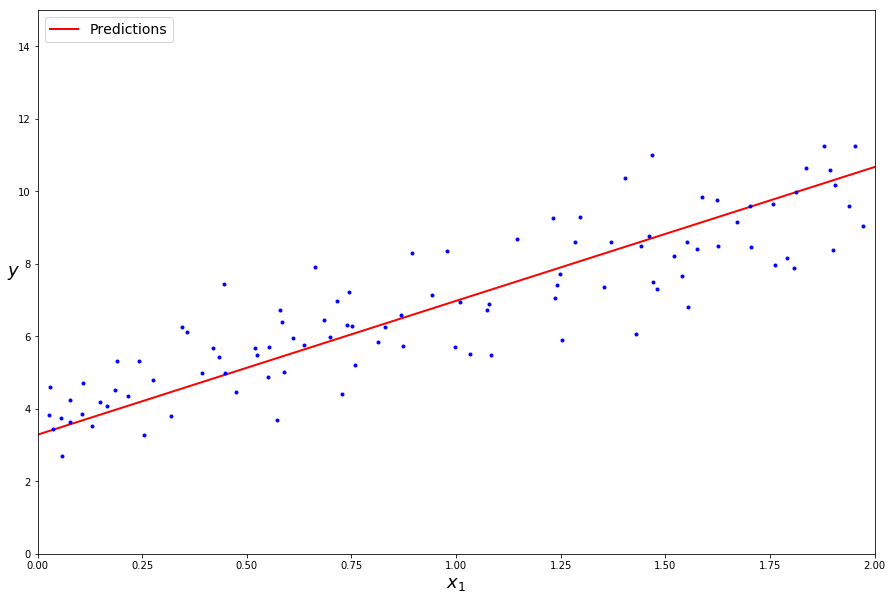

In [164]:
#plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(X_new, y_predict, "r-",linewidth=2, label="Predictions") #read plot
plt.plot(X, y, "b.") #b. blue color 
plt.axis([0, 2, 0, 15]) #change the axis for y_predict
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()


The equivalent code using **Scikit-learn** will be as per the following:

In [51]:
from sklearn.linear_model import LinearRegression
#using LInearRegression module
lin_reg = LinearRegression()
#fitting the model
lin_reg.fit(X,y)
#check the coefficiants, intercept b0 and gradient b1
lin_reg.intercept_, lin_reg.coef_
#prediction, given X_new observations as test data
lin_reg.predict(X_new)

array([[ 3.85948527],
       [10.02508674]])

### Important Note : Normal Equation gets very slow when the number of features grow larger (e.g, 100,000)

# Gradient Descent

- __GD__ is very genetic optimization algorithm capable of finding optimal solutions to wide range of problems, to tweak parameters iteratively in order to minimize a cost funtion by fining __minimal__.



- __GD__ measures the local gradient of the error funciton with regards to the __parameter vector $θ$__, and it goes in direction of *descending gradient*, when **GD =0 ---> minimum reached** 



- **Random initialization** by filling **parameter vector $θ$** with random values and imporve it by takeing small step at a time, each of these small steps attempts to *decrease* the cost function.



- **Learning rate** is an important *hyperparameter* in GD that determine the **size of the steps**, the smallest the learning rate is , the longer time the algorithm will take to go through many iterations 

<br>

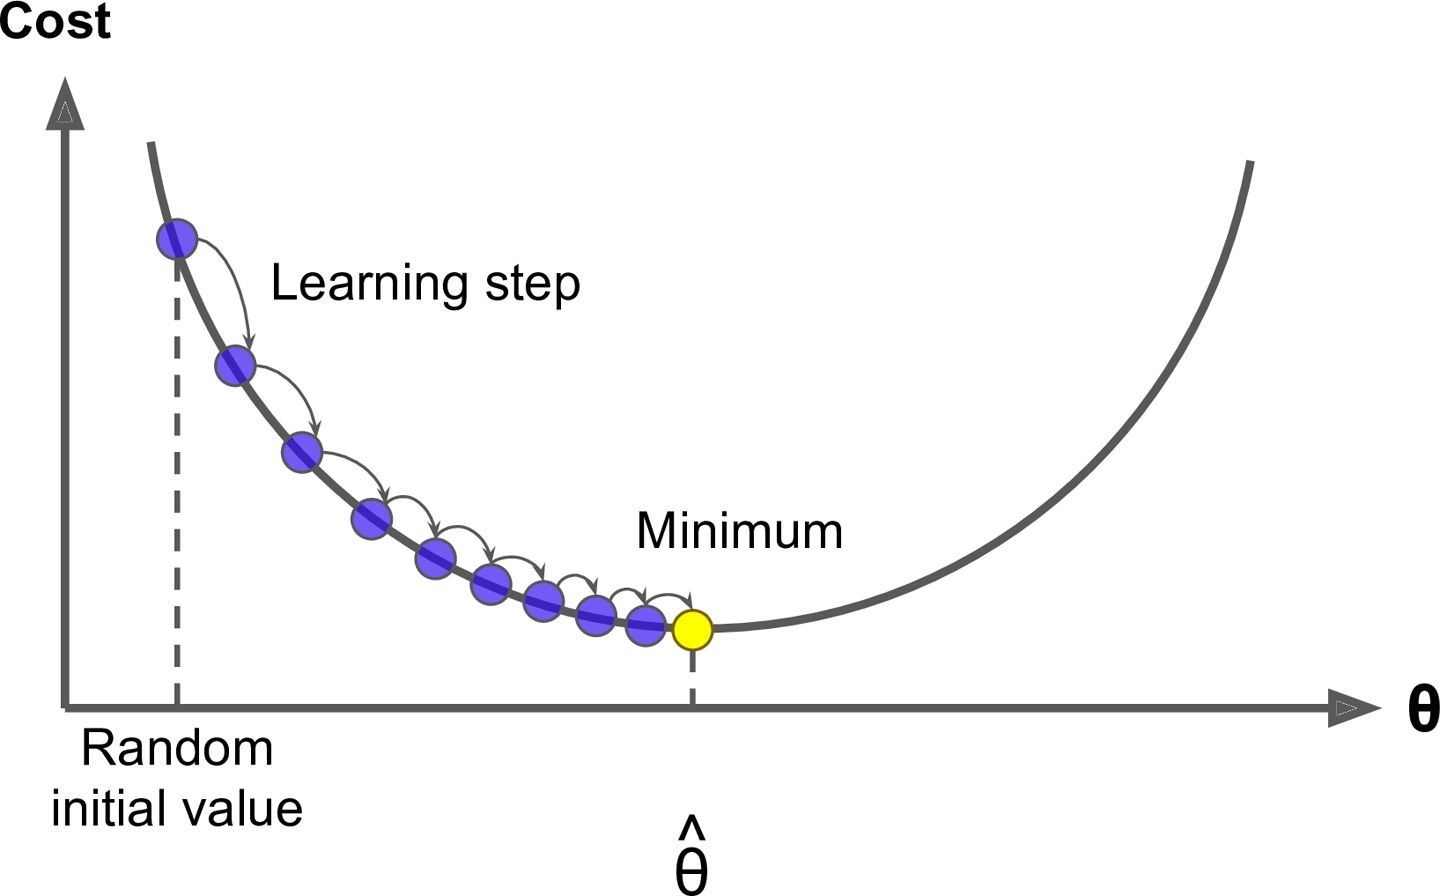

In [52]:
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/GD1.png')

As per the below figure, two main challenges with **Gradient Descent**:

 - If **random initialization** starts the algorithm on the *left*, then it will converge to **local minimum** that is not good as the **global minimum**
 
 - If the algorithm starts on the *right* then it will take very **long time** to cross the plauteau 


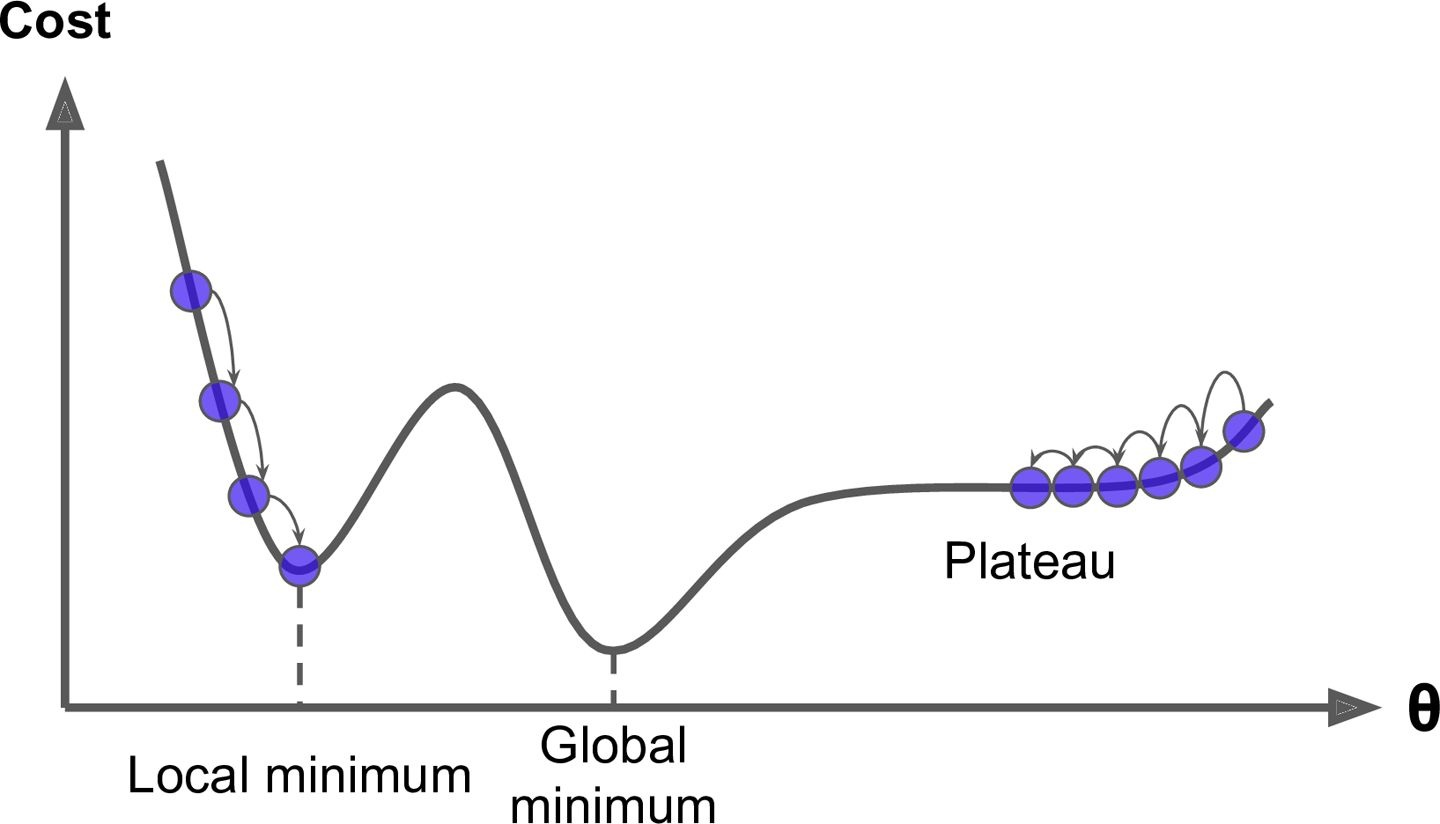

In [53]:
 
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/GD2.png')
    

The **cost function** has the shape of a bowl, but it can be an elongated bowl if the features have very different scales, check the below figure that tells:

- **on the left:** *GD* on training set where features 1 and 2 have **same scale**, the *GD* goes straight toward the **minimum** to qulckly reach it 

- **on the right:** *GD* on training set where features 1 and 2 have **different scale**, feature 1 has smaller values than feature 2, the *GD* first goes in direction almost *orthogonal* to the direction of global minimum and end up with long march down to the **minimum** but will take longe time

**Training model** is searching for *combination of model parameters* that minimizes **cost function** over the training set, which means that the more parameters a model has, the more dimentions this space has and the harder the search is.


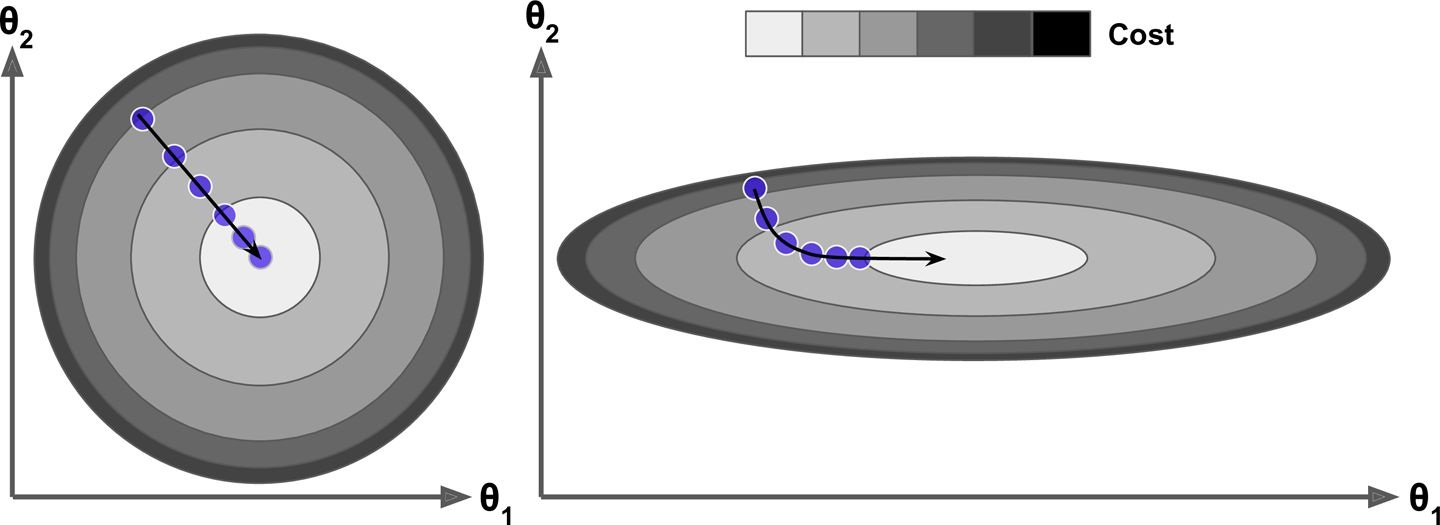

In [60]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/GD3.png')


## Batch Gradient Descent

- Its calculations over the full training set $X$, at each **Gradient Descent step**, **Batch Gradient Descent** use the *whole batch* of training data to compute all the gradients at **every step**, its **slow** Gradient Descent algorithm since it will be slow on very large training sets.


- **Partial derivative:** Calculate how much the cost funciton will change if parameter vector $θ$ changed little bit.


- We can calculate the **partial derivatives** of the **cost function** by computing all gradients *together* instead of individually, to get Gradient vector of the cost function for each model parameter as per the following equation: 

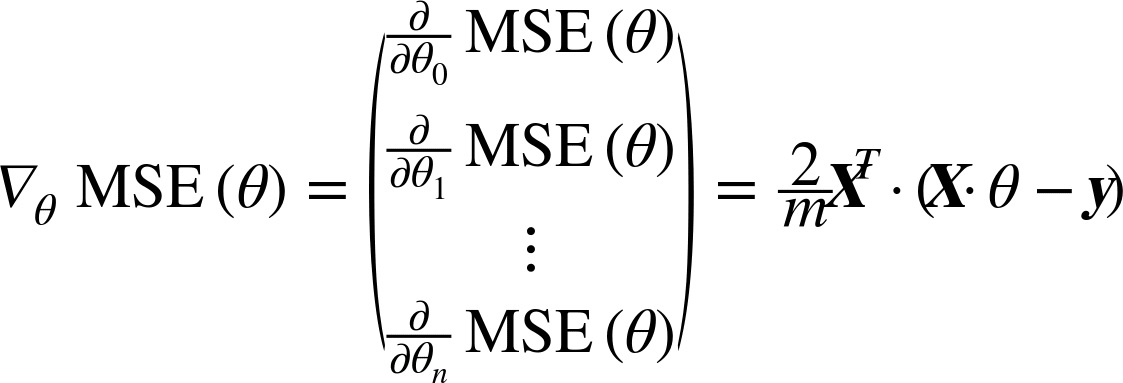

In [90]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/BGD1.png')


Then, the Gradient Descent **next step** will be calculated as per the below equation.

*Subtracting* **Gradient vector** from parameter vector $θ$ to make steps to down hill, but to determine the size of the down hill step, we should *multiply* the Gradient vector by the **learning rate** $η$

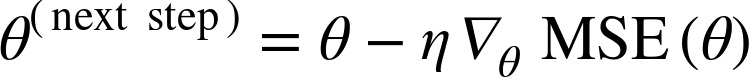

In [91]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/BGD2.png')


The implementatoin of this algorithm:

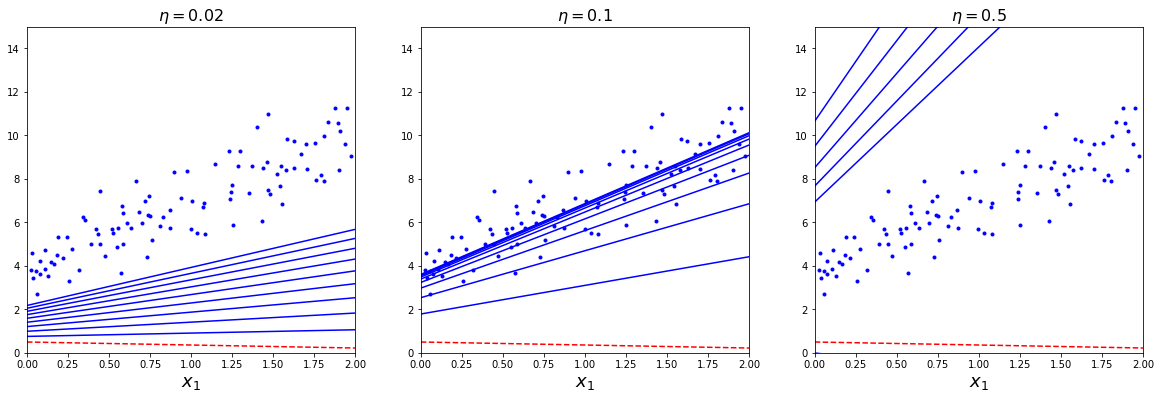

In [115]:
#theta_path_bgd = []

def plot_Batch_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b) # training set 
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        #The first 10 steps of GD
        if iteration < 10: 
            #dot product, multiplication of two arrays, 1D array
            y_predict = X_new_b.dot(theta)
            #LR line ,color = blue, else dashed red
            style = "b-" if iteration > 0 else "r--" 
            #plot 2 arrays given style condiction
            plt.plot(X_new, y_predict, style)
            
        #Calculate the Gradient vector of the cost function 
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        #Calculate the Gradient Descent step
        theta = theta - eta * gradients
        #if theta_path is not None:
            #theta_path.append(theta)
    #label first feature
    plt.xlabel("$x_1$", fontsize=18)
    #change the coordinates of x and y features
    plt.axis([0, 2, 0, 15])
    #plot learning rate value as titel for each suplot
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    np.random.seed(42)

theta = np.random.randn(2,1)  # random initialization
#figure size, vertical = 10 and horizontal =6
plt.figure(figsize=(20,6))
#first suplot with 0.02 learning rate
plt.subplot(131); plot_Batch_gradient_descent(theta, eta=0.02)
#plt.ylabel("$y$", rotation=0, fontsize=18)
##first suplot with 0.1 learning rate
plt.subplot(132); plot_Batch_gradient_descent(theta, eta=0.1)#, theta_path=theta_path_bgd
#first suplot with 0.5 learning rate
plt.subplot(133); plot_Batch_gradient_descent(theta, eta=0.5)

plt.show()

- Learning rate is **too low** $η$ = $0.02$ :the algorithm will reach solution but it will take a long time or maybe still far away from the **optimal solution** when the algorithm stops, this refers to the number of iterations for small steps. 


- Learning rate is **good** $η$ = $0.1$: the value looks very good in just few iterations ***(10 iterations)*** and the algorithm has already **converged** to the solution.


- Learning rate is **too high** $η$ $0.5$: the value doesnt look very good as the algorithm diverges by jumping all over the place and getting further away from the solution at every step of the iteration, wasting time while the model parameters do not change anymore



***Q1: How to find a good learning rate?*** 

Well, by using **grid search**, but its recommended to *limit the number of iterations* so the grid search can eliminate models that takes too long to converge

***Q2: How to find a good number of iterations?***

Well!!, set a *very large number of iterations* but with a condition, when the **length/norm** of GD vector is getting **tiny**, and become *smaller* than a tiny number $ε$ called tolerance ---> interrupt the algorithm becouse Gradient Descent has almost reached the **minimum** 

In [159]:
theta

array([[3.87943771],
       [3.13164986]])

**Comparasion:** 

**Batch Gradient Descent** got the same $θ$ results as **Normal Equation**, however one point to be noted that training a **linear Regression** model when there are hundreads of thousands of features is **much faster** using Gradient Descent than using Normal Equation. 

<br>

## Stochastic Gradient Descent

- It's calculations over picking a random instance in the training set $X$ at every step and compute the gradients based only on that single instance, **SGD algorithm is much faster than BGD** and will be useful to apply on huge training datasets since it has very little data to manipulaate at every iteration, unlike BGD that computes all gradients for whole training dataset every iteration!.


- Unlike **BDG cost function** that decreasing until reaches the *minimum*, **SDG cost function** bounce up and down decreasing only on average and will never settel down, which means the final parameter values are good,but **not optimal** 


- But on the other hand, due to **SGD jumping technique**, it has better chance of escape the *local minimum* and find the *global minimum* than **BGD** does. 

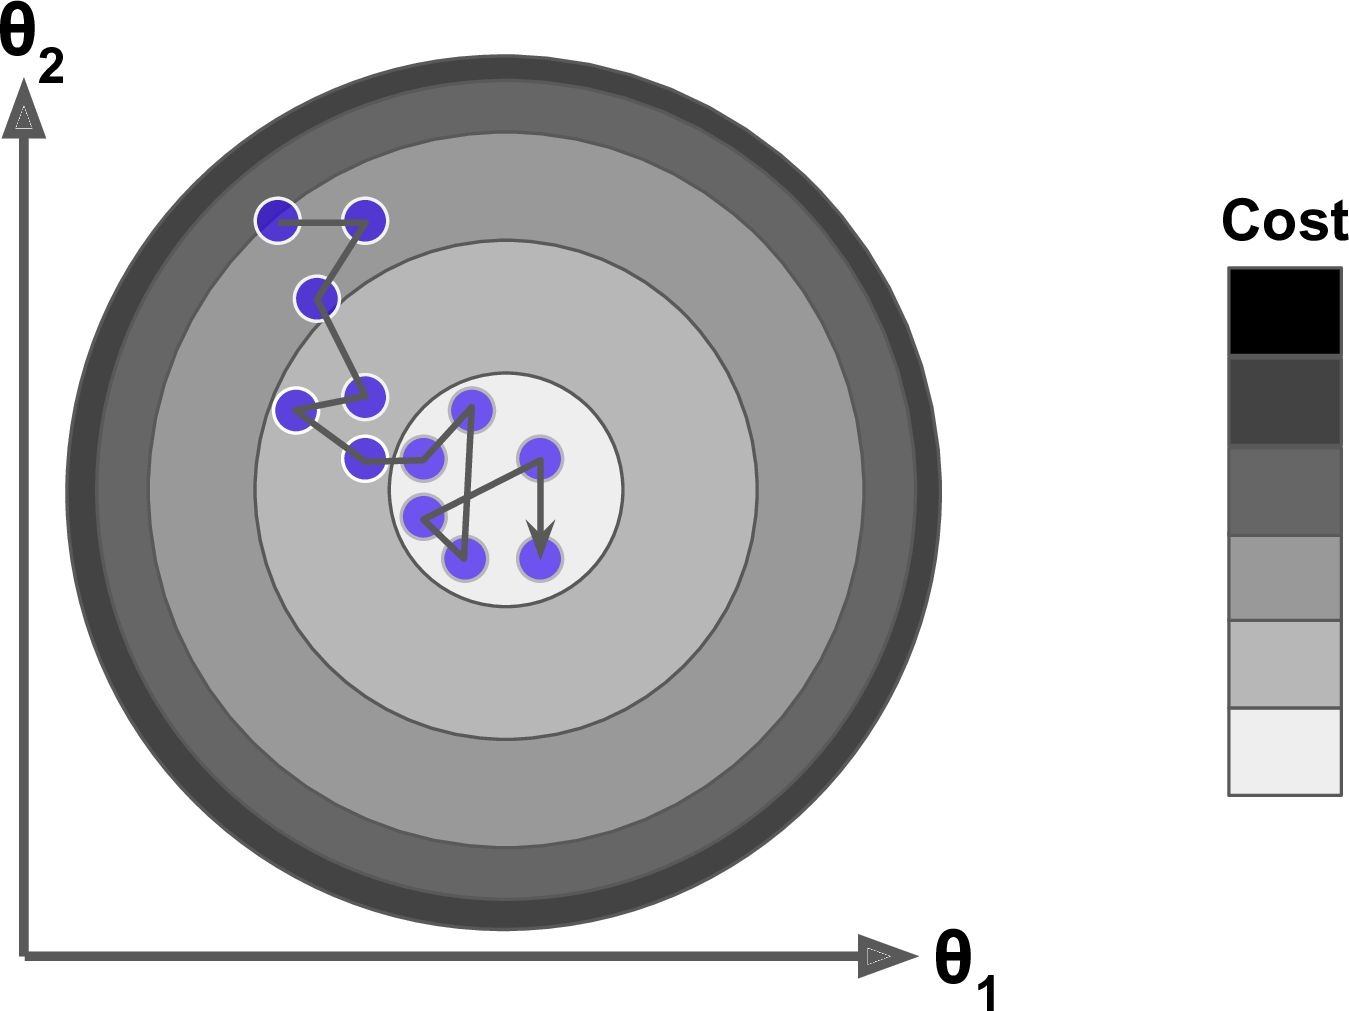

In [120]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/SGD1.png')


__Q3: What is simulated annealing means?__

It's a process of gradually reduce the *learning rate*, first makeing the steps large to escape the **local minumum** and then make **steps** smaller and smaller to settel down at **global minimum**

__Q4: What is learning schedule?__

It's the function used in simulated annealing process to determine the best *learning rate* at each *iteration*, by not reduceing **lr** too quickly that you may get stuck in **local minimum** or on the way to it, and not too slow that keep the jumping for longer time and may end up with suboptimal solution

**The implementation of Stochastic Gradient Descent usning simple learning schedule function:**

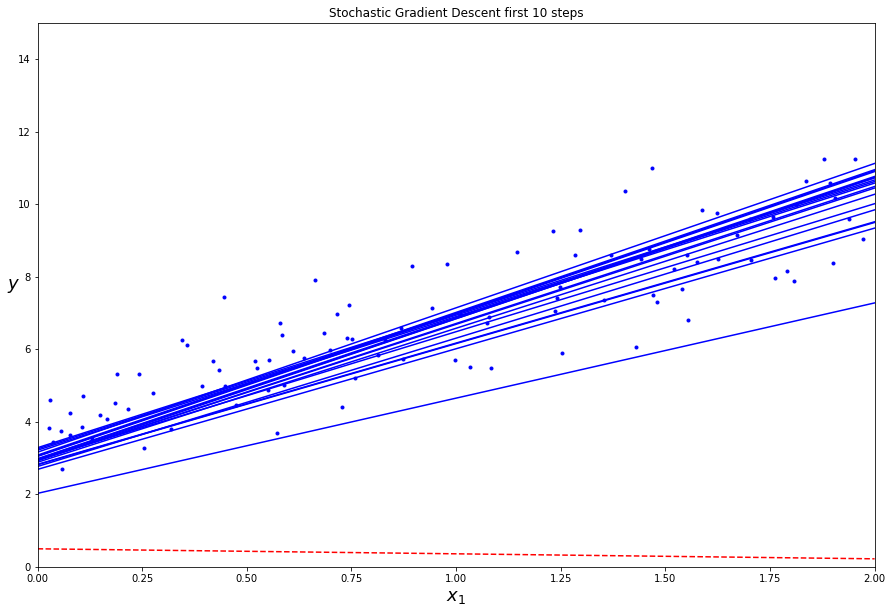

The length of theta_path_sgd list = number of epochs * norm of training data (m) = 50 * 100 =   5000


In [156]:
theta_path_sgd = []
#setting the traning dataset - number of rows
m = len(X_b)
# make it static
np.random.seed(42)
#number of iterations:
n_epochs = 50
# learning schedule hyperparameters - 2 hyperparameters 
t0, t1 = 5, 50 
# t0 = norm of training data (m) / norm of instance (i), 100/20 = 5
# t1 = t0 * number of steps, 5 * 10 = 50


#learning schedule function # t= number of epoch * norm of m + norm of instance
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization
#change the figure size
plt.figure(figsize=(15,10))

#first for loop to go through 50 epoch, each epoch run with single instance of training data 
#50 epoch = 50 instance of training data
for epoch in range(n_epochs):
    for i in range(m):
        #make a prediction 
        if epoch == 0 and i < 20:                    # not shown in the book
            #dot product, multiplication of two arrays
            #X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        #pick random instance from training data using Numpy
        random_index = np.random.randint(m)
        #X_b = np.c_[np.ones((100, 1)), X] ## add x0 = 1 to each instance
        xi = X_b[random_index:random_index+1]
        #print(xi)
        #y = 4 + 3 * X + np.random.randn(100, 1)
        yi = y[random_index:random_index+1]
        #print(yi)
        ##Calculate the Gradient vector of the cost function
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        #learning rate :
        eta = learning_schedule(epoch * m + i)
        #Calculate the Gradient Descent step
        theta = theta - eta * gradients
        #adding GDS value to the list 
        theta_path_sgd.append(theta)                 # not shown

#plot the data with color blue 
plt.plot(X, y, "b.")                                 # not shown
#set up the x and y labels 
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
#change the coordinates of x and y
plt.axis([0, 2, 0, 15])                              # not shown
#save_fig("sgd_plot")  
plt.title("Stochastic Gradient Descent first 10 steps")
# not shown
plt.show() 

print("The length of theta_path_sgd list = number of epochs * norm of training data (m) = 50 * 100 =  ",len(theta_path_sgd))

- Since **instances** are picked randomly, some instances may be picked several times per **epoch** while others may not be picked at all !.

- **SGDRegressor class:** its **Scikit-Learn module** wich optimizing the squared error cost function

The implementation of **SGDRegressor** as per the follwing 3 lines of codes the function takes 3 parameters **(epoch , penalty, learning rate)**

In [157]:
from sklearn.linear_model import SGDRegressor
#penalty : added to the loss function that shrinks model parameters towards the zero vector using 
#either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net) or None.
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [158]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.8616392]), array([3.08611296]))

**Comparasion:** 
Stochastic Gradient Descent got the same **theta** results as Normal Equation.

<br>

# Mini-batch Gradient Descent

Unlike **BGD** which compute the gradients based on *full training set*, or just *one instance* as in **SGD**, the **Mini-batch Gradient Descent** computes all gradients on small random sets of instances called *mini-batches* 

**- Mini-batch GD** gives better performance boost than **SGD**, especially when using GPUs, and the parameter space is less erratic than with SGD, especially with large *mini-batches*
- **Mini-batch GD** end up walking around bit closer to **minimum** than **SGD**,but maybe harder to escape from **local minima**
- **SGD** and **MbGD** reach the **minimum** if a good **leaning schedule** used. 
- the below figure showes three GD algorithm in parameter space, only **BGD** stops at the minumum while **SGD** and **M-bGD** continue to walk around

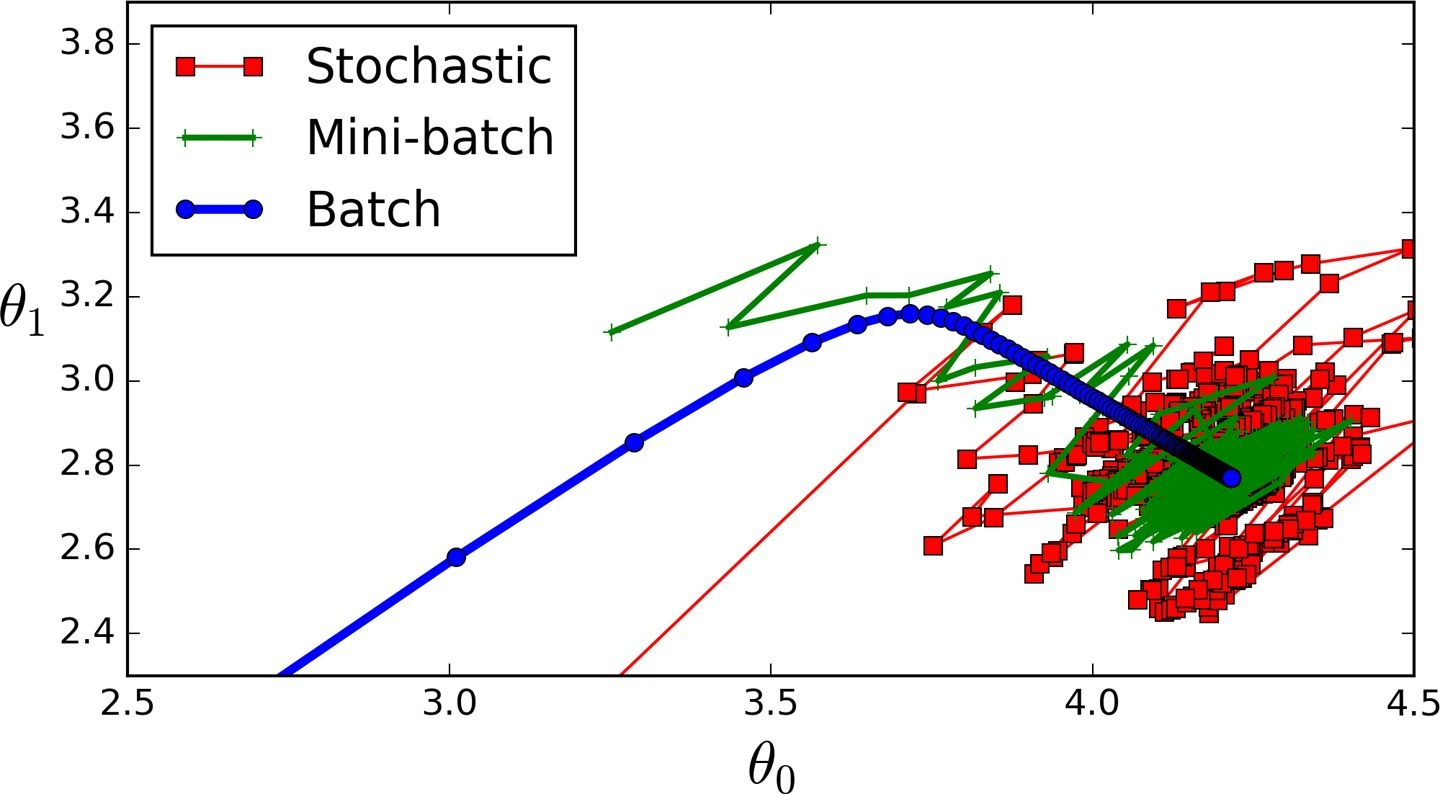

In [161]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/B-S-M_GD.png')

**Comparision of algorithms for Linear Regression:** 
There is almost **no difference** after training, all these algorithms end up with very similar models and make predictions in exactly
the same way

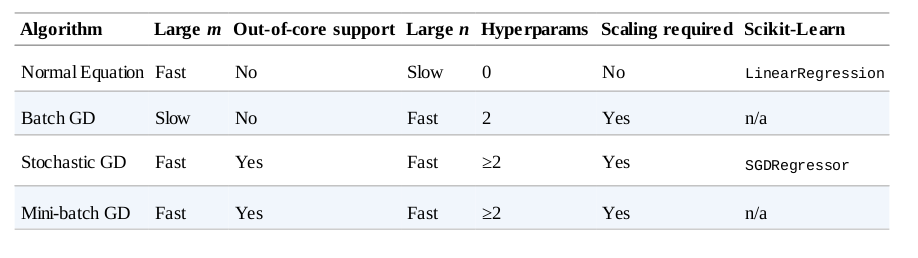

In [163]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/Comparasion.png')